In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.isnull().sum()

from sklearn.preprocessing import StandardScaler

features = ['Age','Annual Income (k$)','Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

Matplotlib is building the font cache; this may take a moment.


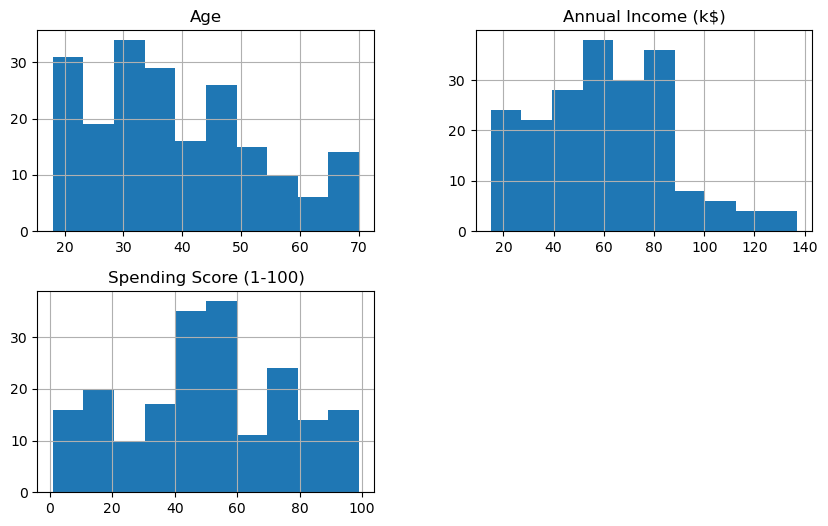

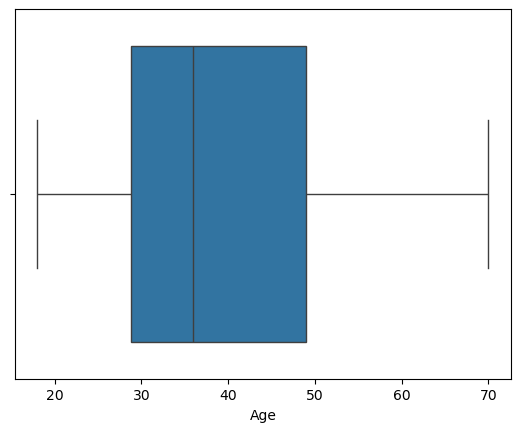

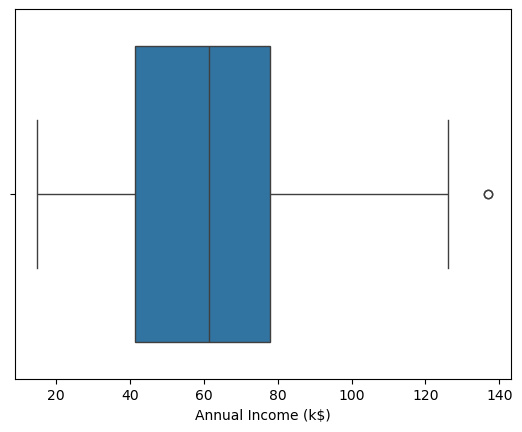

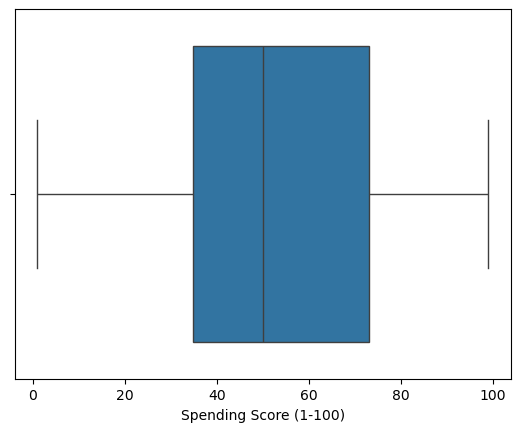

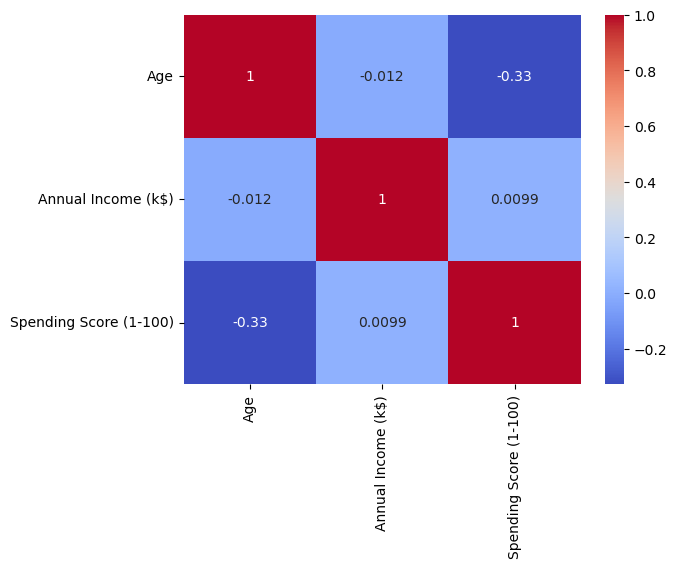

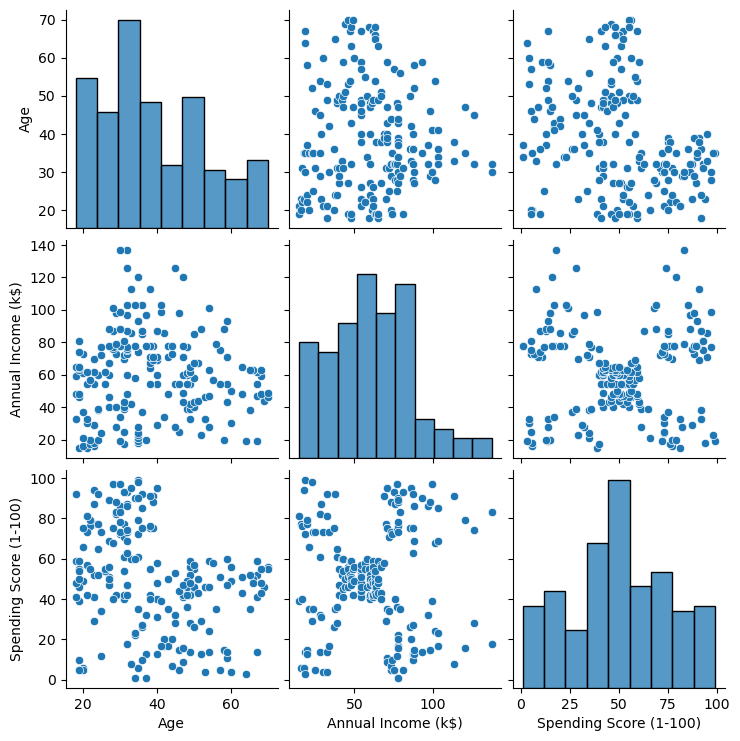

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df[features].hist(figsize=(10, 6))
plt.show()

for feature in features:
    sns.boxplot(x=df[feature])
    plt.show()


sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')

sns.pairplot(df[features])

In [6]:
df = df.drop(['CustomerID'], axis=1)

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 100], labels=['Jeune','Adulte','Senior'])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

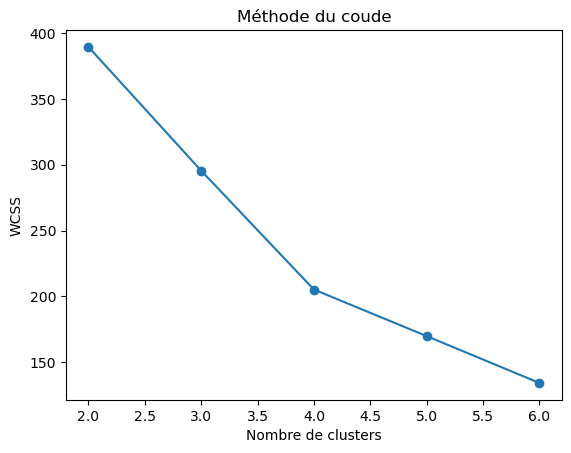

Pour k = 2, silhouette = 0.33547192894004574
Pour k = 3, silhouette = 0.3579234303882264
Pour k = 4, silhouette = 0.4039582785148566
Pour k = 5, silhouette = 0.40846873777345605
Pour k = 6, silhouette = 0.43106526216603014


C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Méthode du coude
wcss = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 7), wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()

# Silhouette
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette = silhouette_score(df_scaled, labels)
    print(f"Pour k = {k}, silhouette = {silhouette}")

C:\Users\ricardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


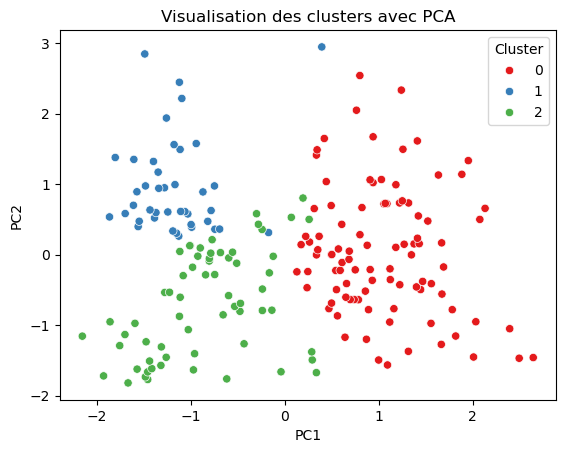

In [14]:
# Appliquer K-means final
optimal_k = 3  # Ex : si trouvé avec le coude et silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Ajouter les labels au DataFrame PCA
pca_df['Cluster'] = labels

# Visualiser
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Visualisation des clusters avec PCA')
plt.show()

# Visualisation des centroïdes
centroids = kmeans.cluster_centers_

In [ ]:
Conclusion: Synthèse et suggestions

L’analyse a conduit à la segmentation des clients en 3 groupes distincts à l’aide de l’algorithme K-means.
La méthode du coude et les indices du silhouette indiquaient les performances s’amélioraient avec l’augmentation du nombre de clusters, mais l’indice de silhouette restait modéré (maximum ≈ 0.43 pour k = 6).
Pour des raisons de simplicité et de lisibilité, nous avons retenu k = 3 clusters.
La visualisation en 2D par PCA montre une séparation relativement correcte entre les clusters avec :
         Cluster 0 : Groupe centralisé avec une forte densité de clients.

         Cluster 1 : Groupe plus dispersé et situé dans une zone distincte.

         Cluster 2 : Groupe bien identifié avec une localisation opposée aux deux autres.

Chaque cluster représente un profil de client différent en fonction des variables quantitatives (âge, revenu annuel, score de dépense)

 Pertinence et cohérence des clusters :

    -Les groupes sont visuellement séparés.

    -Les indices de silhouette obtenus montrent une cohésion acceptable même si la qualité des clusters n’est pas parfaite (indice inférieur à 0.5).

    -Un léger chevauchement reste visible entre le cluster 1 (bleu) et le cluster 2 (vert), ce qui suggère que certains clients présentent des comportements intermédiaires.

 Suggestions d’améliorations :

    -Tester une segmentation avec plus de variables (par exemple : fréquence d’achat, catégorie de produits, comportements en ligne).

    -Ajouter des données temporelles pour analyser si les comportements évoluent dans le temps.
